In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
total_clients_df=pd.read_csv('total_clients_df.csv',parse_dates=['date'])
ortho_installations_df=pd.read_csv('installations_df.csv',parse_dates=['date'])
ortho_appointments_df=pd.read_csv('appointments_df.csv' ,parse_dates=['ortho_maintenance_date'])

In [ ]:
##  Quarterly Cohort Analysis and churn analysis. Given the 5 year analysis period, a monthly heatmap from 2020 to 2025 would be excessively cluttered and difficult to interpret. So, a quarterly analysis was chosen.

## Filter data up to the end of Q2 2025
limit_date = pd.to_datetime('2025-05-01')
filtered_ortho_appointments = ortho_appointments_df[ortho_appointments_df['ortho_maintenance_date'] <= limit_date].copy() #### Filter data up to the end of Q2 2025

df_first_appointment = filtered_ortho_appointments.groupby('patient_id')['ortho_maintenance_date'].min().reset_index() ### Define each patient's cohort by the quarter of their first appointment(installation of orthodontic braces).###
df_first_appointment.rename(columns={'ortho_maintenance_date': 'first_appointment'}, inplace=True)
df_first_appointment['cohort_quarter'] = df_first_appointment['first_appointment'].dt.to_period('Q')

### Join the cohorts to the original appointments dataframe.###
df_with_cohort = pd.merge(filtered_ortho_appointments, df_first_appointment, on='patient_id')

### Calculate the cohort index for each appointment (in quarters).###
df_with_cohort['appointment_quarter'] = df_with_cohort['ortho_maintenance_date'].dt.to_period('Q')
df_with_cohort['delta_quarters'] = (df_with_cohort['appointment_quarter'].astype(int) - df_with_cohort['cohort_quarter'].astype(int))
df_with_cohort.rename(columns={'delta_quarters': 'quarterly_cohort_index'}, inplace=True)

## Count the number of unique patients per cohort and index.##
cohort_data = df_with_cohort.groupby(['cohort_quarter', 'quarterly_cohort_index'])['patient_id'].nunique().reset_index()

### Create the retention matrix ( pivot table) ###
quarterly_retention_matrix = cohort_data.pivot(index='cohort_quarter', columns='quarterly_cohort_index', values='patient_id')


cohort_sizes = quarterly_retention_matrix.iloc[:, 0].astype(int) ### Calculate the size of each cohort (number of patients in the first quarter) ###

# calculate retention in %
quarterly_retention_matrix_pct = quarterly_retention_matrix.divide(cohort_sizes, axis=0).fillna(0).multiply(100)

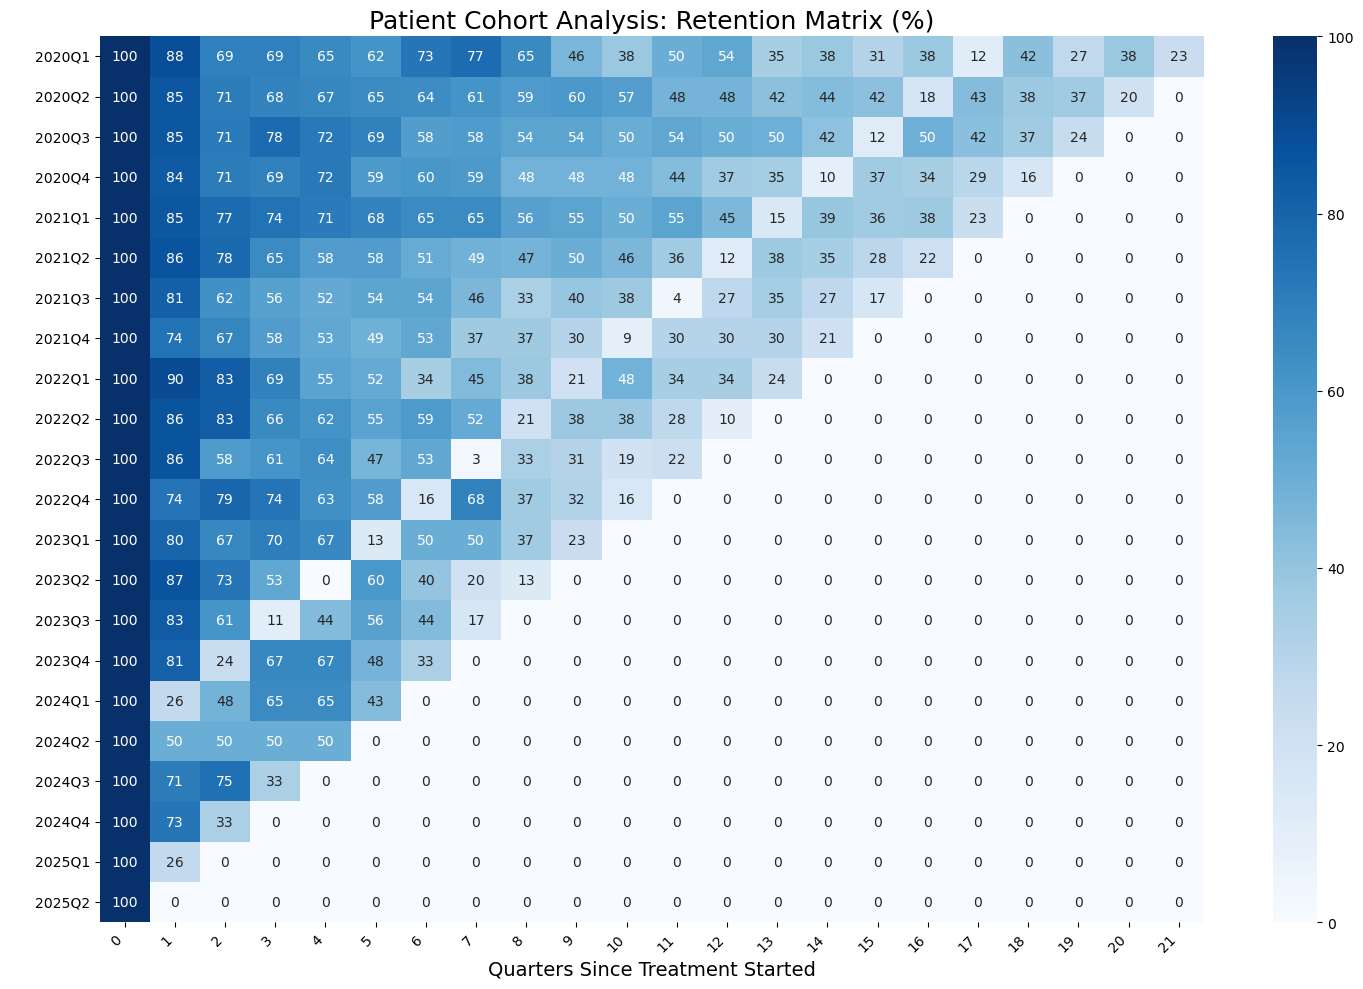


Size of Each Cohort (Number of Patients)
cohort_quarter
2020Q1     26
2020Q2    145
2020Q3    125
2020Q4     93
2021Q1     66
2021Q2     74
2021Q3     48
2021Q4     43
2022Q1     29
2022Q2     29
2022Q3     36
2022Q4     19
2023Q1     30
2023Q2     15
2023Q3     18
2023Q4     21
2024Q1     23
2024Q2      2
2024Q3     48
2024Q4     15
2025Q1     19
2025Q2      4
Freq: Q-DEC, Name: 0, dtype: int64


In [ ]:
## heatmap visualization
plt.figure(figsize=(15, 10))
sns.heatmap(retention_matrix_trimestral_pct,
            annot=True,
            fmt='.0f',
            cmap='Blues',
            vmin=0, vmax=100)

plt.title('Patient Cohort Analysis: Retention Matrix (%)', fontsize=18)
plt.xlabel('Quarters Since Treatment Started', fontsize=14)
plt.ylabel(' ',fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nSize of Each Cohort (Number of Patients)")
print(cohort_sizes)